In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
from scipy.stats import mannwhitneyu
from statsmodels.stats.multicomp import MultiComparison
import matplotlib.patches as mpl_patches
import scipy.stats as stats
import os
import matplotlib.gridspec as gridspec

In [3]:
df = pd.read_table('FigS9C.csv', sep = "\t")
df.head()

,Sample,Replicate,Cp_PP2A,Cp_NRAMP1,∆_PP2A,∆_NRAMP1,Ratio
0,F13-8,#1,26.33,25.75,1.23,2.39,2.20
1,F13-8,#2,26.53,25.81,1.03,2.33,2.41
2,F13-8,#3,27.17,26.66,0.39,1.48,2.09
3,Col-0,#1,27.81,28.61,-0.25,-0.47,0.86
4,Col-0,#2,27.44,27.55,0.12,0.59,1.38


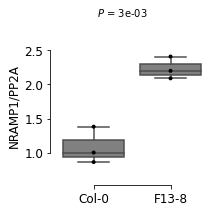

In [30]:
Order=['Col-0','F13-8']
test=stats.ttest_ind(df.loc[df['Sample'] == 'F13-8','Ratio'], df.loc[df['Sample'] == 'Col-0','Ratio'])
cm=1/2.54
fig,axes= plt.subplots(figsize=(7*cm,7*cm))
sns.boxplot(x='Sample',
            y='Ratio',
            data=df,
            color = 'grey',
            order=Order)
sns.swarmplot(x='Sample',
              y='Ratio',
              data=df,
              color = 'k',
              s = 4,
              order=Order)
axes.text(0.04, 3, '$\itP$ = {:.0e}'.format(test[1],fontsize=12))
plt.ylim(0.6,2.8)
sns.despine(trim=True,offset=5)
plt.ylabel('NRAMP1/PP2A',fontsize=12)

plt.tick_params(labelsize=12)
plt.xlabel('')
plt.savefig("FigS9C.png", format="png",bbox_inches="tight", facecolor="w", dpi=400)